Excercise to create random number generator with predefined distribution function

np.random.random returns values in the half-open interval [0, 1) which means equal to or grater than zero, and up to but less than 1

In [59]:
import random
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from rc_random import RandomGen
%matplotlib inline
import math

np.random.seed(1000)

In [71]:
?math.fsum

In [76]:
?np.random.random()

In [60]:
random_nums = [-1, 0, 1, 2, 3]
probabilities = [0.01, 0.3, 0.58, 0.1, 0.01]

Find baskets that randomly drawn values fall into, then assign the predetermined number covering that basket

In [64]:
cumsum = [sum(probabilities[:i+1]) for i, v in enumerate(probabilities)]

cumsum = [math.fsum(probabilities[:i+1]) for i, v in enumerate(probabilities)]  # Its ok we didnt used this as numpy never returns 1.0

In [66]:
cumsum

[0.01, 0.31, 0.8899999999999999, 0.9899999999999999, 0.9999999999999999]

In [67]:
rand = np.random.random()
rand

0.6535895854646095

In [79]:
index_greater_than_rand = [i for i, v in enumerate(cumsum) if v > rand]  # return cumsum indexes greater than the rand
print([cumsum[i] for i in index_greater_than_rand])

[0.8899999999999999, 0.9899999999999999, 0.9999999999999999]


In [69]:
index_greater_than_rand[0]

2

In [70]:
random_nums[index_greater_than_rand[0]]

1

## Testing

More pythonic to create a generator?

In [80]:
g1 = RandomGen(random_nums, probabilities)

In [81]:
g1.next_num()

1

In [83]:
%%time
test = [g1.next_num() for i in range(1000000)]

CPU times: user 1.34 s, sys: 14.7 ms, total: 1.36 s
Wall time: 1.36 s


(array([  10129.,       0.,  300194.,       0.,       0.,  579641.,
              0.,  100001.,       0.,   10035.]),
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ,  1.4,  1.8,  2.2,  2.6,  3. ]),
 <a list of 10 Patch objects>)

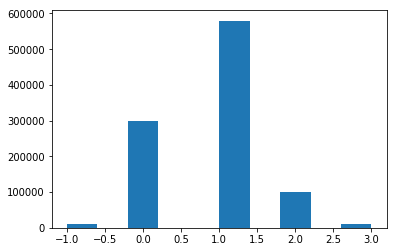

In [84]:
plt.hist(test)

Lets get the number of counts

In [85]:
unique, counts = np.unique(test, return_counts=True)
dict(zip(unique, counts))

{-1: 10129, 0: 300194, 1: 579641, 2: 100001, 3: 10035}

In [86]:
counts

array([ 10129, 300194, 579641, 100001,  10035])

Now we compare the relative counts with the relative probabilities

In [87]:
norm_counts = counts/max(counts)
norm_counts

array([ 0.01747461,  0.51789642,  1.        ,  0.1725223 ,  0.01731244])

In [88]:
norm_probs = np.array(probabilities)/max(probabilities)
norm_probs

array([ 0.01724138,  0.51724138,  1.        ,  0.17241379,  0.01724138])

In [89]:
diff = norm_counts/norm_probs
diff

array([ 1.01352734,  1.00126642,  1.        ,  1.00062936,  1.00412152])

In [90]:
diff_spread_percent = 100.0*(max(diff) - min(diff))
max_diff = int(diff_spread_percent)

In [91]:
print("So for {} samples the error is {} percent".format(test_len, max_diff))

So for 1000000 samples the error is 1 percent


In [92]:
x = 3.14159
x.as_integer_ratio()

(3537115888337719, 1125899906842624)

In [93]:
3537115888337719/1125899906842624

3.14159

In [94]:
y = 0.1
y.as_integer_ratio()

(3602879701896397, 36028797018963968)

In [95]:
3602879701896397/36028797018963968

0.1

## Normal dist

In [21]:
x = np.linspace(-10,10,1000)

In [37]:
mu = -1
sigma = 1
y = ((2*np.pi*sigma)**-0.5) * np.exp(-((x-mu)**2)/(2*sigma**2))

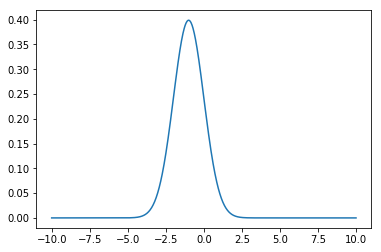

In [38]:
plt.plot(x,y)

## Pseudo random generator

In [39]:
def lcg(modulus, a, c, seed):
    while True:
        seed = (a * seed + c) % modulus
        yield seed

In [41]:
modulus = 3 
a = 2 
c = 3 
seed = 2304283
my_gen = lcg(modulus, a, c, seed)

In [47]:
next(my_gen)

1